In [6]:
!pip install  C:/kaggletemp/sartorius-cell-instance-segmentation/cellpose_install/cellpose-0.7.2-py3-none-any.whl  --no-index --find-links=file://C:/kaggletemp/sartorius-cell-instance-segmentation/cellpose-install/

Looking in links: file://C:/kaggletemp/sartorius-cell-instance-segmentation/cellpose-install/
Processing c:\kaggletemp\sartorius-cell-instance-segmentation\cellpose_install\cellpose-0.7.2-py3-none-any.whl


In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from glob import glob
from tifffile import imsave ,imread
import tifffile
import matplotlib.pyplot as plt
from PIL import Image
from cellpose import models, io , plot
import torch.cuda
from sklearn.model_selection import StratifiedKFold, train_test_split

os.environ["CELLPOSE_LOCAL_MODELS_PATH"] = "C:/kaggletemp/sartorius-cell-instance-segmentation/CELLPOSE_MODELS"





MASK_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation/mask_celllpose"
DATA_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation"
TDIR = DATA_DIR + "/" + "CP_TRAINING/"
TRAIN = TDIR + '/TRAIN/'
LABEL = TDIR +'/LABEL/'
FINAL = TDIR + '/ALL/'

2021-12-29 04:37:00,408 [INFO] WRITING LOG OUTPUT TO C:\Users\rpsan\.cellpose\run.log


In [2]:
# # MAKE MASKS FOR CELLPOSE
# import scipy.ndimage as ndi
# #import skimage.morphology as morph
# from skimage.filters import threshold_otsu
# width = 704
# height = 520
# shape = [height,width]
#
# def clean_mask(mask):
#     mask = mask > threshold_otsu(np.array(mask).astype(np.uint8))
#     mask = ndi.binary_fill_holes(mask)
#
#     return mask
#
# def rles_to_mask(encs, shape):
#     """
#     Decodes a rle.
#
#     Args:
#         encs (list of str): Rles for each class.
#         shape (tuple [2]): Mask size.
#
#     Returns:
#         np array [shape]: Mask.
#     """
#     img = np.zeros(shape[0] * shape[1], dtype=np.uint)
#     if type(encs)==float:
#         return img
#     for m, enc in enumerate(encs):
#         if isinstance(enc, np.float) and np.isnan(enc):
#             continue
#         enc_split = enc.split()
#         for i in range(len(enc_split) // 2):
#             start = int(enc_split[2 * i]) - 1
#             length = int(enc_split[2 * i + 1])
#             img[start: start + length] = 1 + m
#     return img.reshape(shape)
#
# train_df = pd.read_csv('C:/kaggletemp/sartorius-cell-instance-segmentation/train.csv')
# train_df = train_df.groupby('id').annotation.agg(list).reset_index()
# MDIR = "C:/kaggletemp/sartorius-cell-instance-segmentation/mask_cellpose"
#
# # def makem(id):
# #     enc = train_df[ train_df['id'] == id].annotation
# #     mask_dec = rles_to_mask(enc, shape=(520, 704))
# #     mask_dec = clean_mask(mask_dec)
# #     #mask_dec.clip(0,1)
# #     cv2.imwrite( f"C:/kaggletemp/sartorius-cell-instance-segmentation/mask_cellpose/{image_id}.png", mask_dec)
#
# # for i in train_df.id:
# #     makem(i)
# for i,row in train_df.iterrows():
#     mask_dec = rles_to_mask(row.annotation, shape).astype(np.uint16)
#     mask_dec = clean_mask(mask_dec)
#     mask_dec= (mask_dec).astype(np.uint16)
#     #mask_dec.clip(0,1)
#     #mask_dec = np.expand_dims(mask_dec, axis =2  )
#     #print(np.unique(mask_dec, return_counts=True))
#     tifffile.imwrite( 'C:/kaggletemp/sartorius-cell-instance-segmentation/mask_cellpose/'+ train_df.id[i] +'.png',  mask_dec)
#
#     #print (np.unique(mask_dec) )
#     #print(mask_dec.shape, train_df.id[i])

In [ ]:
cpath = ("C:/kaggletemp/sartorius-cell-instance-segmentation/mask_cellpose/")
mm = os.listdir(cpath)
mm = [cpath + x for x in mm]
x = tifffile.imread (mm[4] )
plt.imshow(x)
print ( np.unique(x) )
x.shape

((520, 704), (520, 704)) [0 1] uint16 uint16


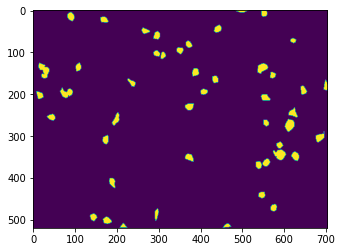

In [27]:
# Make data for training
reprocess = True

MASK_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation/mask_cellpose"
DATA_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation"

ms = sorted(glob(os.path.join(MASK_DIR, "*.png")))
im = sorted(glob(os.path.join(DATA_DIR, "train/*")))


if reprocess :
    # create data for cellpose training


    check = os.path.isdir("CP_TRAINING")
    if not check:
        os.mkdir("CP_TRAINING")

    TDIR = DATA_DIR + "/" + "CP_TRAINING/"
    #for img, mask in zip(im[1:2], ms[1:2]):
    for img, mask in zip(im, ms):

        path, file_img = os.path.split(img)
        file_img = file_img.replace(".png", "_img.tif")
        img = ( cv2.imread(img) ).astype(np.uint16)
        img = img[:,:,0]
        #imx = np.moveaxis(imx,-1,0)
        #x = Image.open( imx )
        imsave(TRAIN + file_img, img)

        path, file_mask = os.path.split(mask)
        file_mask = file_mask.replace(".png", "_masks.tif")
        #mx = cv2.imread(mx)#,cv2.IMREAD_GRAYSCALE )
        mask = imread(mask)
        #mask = np.moveaxis( mask, -1,0)

        #print(np.unique(mx))
        imsave( LABEL+ file_mask, mask)


        # mx = imread(TDIR +'/LABEL/'+ file_mask)
        # imx = imread(TDIR + '/TRAIN/' + file_img)
        # plt.figure(figsize= (16,10))
        # plt.subplot(1,3,1)
        # plt.imshow(imx)
        # plt.title("image")
        # plt.subplot(1,3,2)
        # plt.imshow(mx)
        # plt.title("mask")

    x = np.asarray(img)
    y= np.asarray(mask)
    print( (x.shape ,y.shape), np.unique(mask), x.dtype, y.dtype )
    plt.imshow(y)


(520, 704, 3)

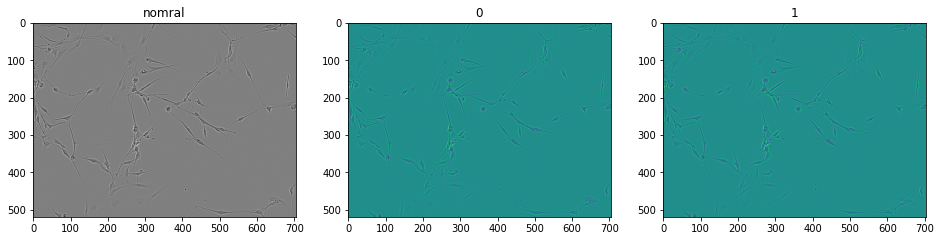

In [3]:
#im = sorted(glob(os.path.join(DATA_DIR, "train/*")))
im = os.listdir( "C:/kaggletemp/sartorius-cell-instance-segmentation/train/" )
im = [ "C:/kaggletemp/sartorius-cell-instance-segmentation/train/" + x for x in im]
image_= cv2.imread(im[1])

plt.figure(figsize= (16,10))
plt.subplot(1,3,1)
plt.imshow(image_)
plt.title("nomral")
plt.subplot(1,3,2)
plt.imshow(image_[:,:,0])
plt.title("0")

plt.subplot(1,3,3)
plt.imshow(image_[:,:,2])
plt.title("1")

image_.shape

In [6]:
# x = tifffile.imread (im[1] )
# x.shape

In [7]:
# cv2.IMREAD_COLOR: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
# cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
# cv2.IMREAD_UNCHANGED: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag.
x = tifffile.imread(ms[0])
#imx = np.moveaxis(imx,-1,0)
plt.figure(figsize=(6,4))
x = imx
plt.imshow(x, cmap= "gray")

#np.unique(x, return_counts=True)
np.unique(x)

NameError: name 'imx' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
# Making Train Test

#For some reason, cv2.imread is not working for .tif

In [22]:
old_pretrained_model = "C:/Users/rpsan/.cellpose/models/cyto2torch_0"
train_save_dir = "C:/kaggletemp/sartorius-cell-instance-segmentation/CELLPOSE_MODELS"

MASK_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation/mask_celllpose"
DATA_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation"
TDIR = DATA_DIR + "/" + "CP_TRAINING/"
TRAIN = TDIR + '/TRAIN/'
LABEL = TDIR +'/LABEL/'



df_data = pd.read_csv(os.path.join(DATA_DIR,'train.csv') )
df = df_data.groupby('id')['cell_type'].first().reset_index()
# skf = StratifiedKFold(n_splits= 2)
# itrain, itest = skf.split(df.id.values, df.cell_type.values)

X_train, X_test, y_train, y_test = train_test_split( df.id.values, df.cell_type.values, test_size=.2, stratify= df.cell_type)
# train_images = [ f for f in os.listdir(TRAIN)  if not f.endswith('flows.tif')  ]
# train_images = [TRAIN + x for x in train_images]
#
#TRAIN
train_files = [ TRAIN + x + '.tif' for x in X_train ]
train_data = [ imread(x) for x in train_files]

train_labels_tif = [ LABEL + x + '_masks.tif' for x in X_train ]
train_labels_tif = [ imread(x) for x in train_labels_tif]
train_labels_tif = [ np.moveaxis(x,-1,0) for x in train_labels_tif]

train_labels_flow = [ LABEL + x + '_flows.tif' for x in X_train ]
# train_labels_flow = [ imread(x) for x in train_labels_flow]
# train_labels_flow = [ np.squeeze(x) for x in train_labels_flow]

#train_labels_tif.append(train_labels_flow)
#train_labels = train_labels_tif + train_labels_flow
##Validation
test_files = [ TRAIN + x + '.tif' for x in X_test ]
test_data = [ imread(x) for x in test_files]

test_labels_tif = [ LABEL + x + '_masks.tif' for x in X_test ]
test_labels_tif = [ imread(x) for x in test_labels_tif]
test_labels_tif = [ np.moveaxis(x,-1,0) for x in test_labels_tif]

test_labels_flow = [ LABEL + x + '_flows.tif' for x in X_test ]
# test_labels_flow = [ imread(x) for x in test_labels_flow]
# test_labels_flow = [ np.squeeze(x) for x in test_labels_flow]

#test_labels_tif.append(test_labels_flow)
#test_labels = test_labels_tif + test_labels_flow
#get unique ids
# ids =[]
# for image_path in train_images:
#     path, file = os.path.split(image_path)
#     id =  file.split('.')[0]
#     ids.append(id)





In [23]:
tdir = [ LABEL + x + '_masks.tif' for x in X_train ]
tdirf = [ LABEL + x + '_flows.tif' for x in X_train ]


from cellpose import io
x = imread(tdirf[0])
x.shape

(5, 520, 704, 1)

In [ ]:
use_gpu = True
# use_gpu = torch.cuda.is_available()
# device_math = torch.device(type="cuda" if use_gpu else "cpu")
# device_cpu = torch.device("cpu")
if use_gpu : #device_math.type=="cuda":
    print(f"Using GPU when tensors are loaded to 'device_math'.\n"
          f"  Device: {torch.cuda.get_device_name()}\n"
          f"  Number of GPUs: {torch.cuda.device_count()}\n"
          f"  GPU initialised: {torch.cuda.is_initialized()}\n")
    device = torch.device('cuda')
    print("using gpu")

    #print(torch.cuda.memory_summary())
else:
    print("GPU not available, all tensors loaded to 'device_math' will reside "
          "in CPU memory.")
    device =  torch.device("cpu")
    print("using cpu")

model=models.CellposeModel(diam_mean=50, gpu = True, device= device, torch= True, model_type="cyto" )  #pretrained_model=old_pretrained_model,
model.train(train_data=train_data, train_labels=train_labels_tif , train_files = train_files  ,
            test_data=test_data, test_labels=test_labels_tif  ,test_files = test_files ,
            channels=[0,0],
            normalize=True,
            pretrained_model=old_pretrained_model,
            save_path=train_save_dir, save_every=100,
            learning_rate=0.5,
            n_epochs=1200,
            #momentum=0.9,
            #weight_decay=0.00001,
            batch_size=12,
            rescale= True)


In [54]:
model_to_load = 'cyto' ## cyto, cyto2, nuclei
number_of_epochs = 50  ## Train more epochs for better results
batch_size = 8
initial_learning_rate = 0.0002
Training_channel = 0 # For grayscale
Second_training_channel= 0
train_folder = 'C:/kaggletemp/sartorius-cell-instance-segmentation/CP_TRAINING/ALL/'
MASK_FILTER = 'masks'
IMG_FILTER = "img"
#test_folder = '/tmp/cellpose_train/val'
# --use_gpu

In [55]:
!python -m cellpose --train --fast_mode \
        --dir "$train_folder"  --use_gpu \
        --pretrained_model $model_to_load \
        --chan $Training_channel --chan2 $Second_training_channel \
        --n_epochs $number_of_epochs \
        --learning_rate $initial_learning_rate \
        --batch_size $batch_size \
        --mask_filter $MASK_FILTER  --img_filter $IMG_FILTER

^C


2021-12-29 01:10:40,623 [WARNING] pretrained model has incorrect path
2021-12-29 01:10:40,624 [INFO] >>cyto<< model set to be used
2021-12-29 01:10:40,625 [INFO] >>>> using CPU


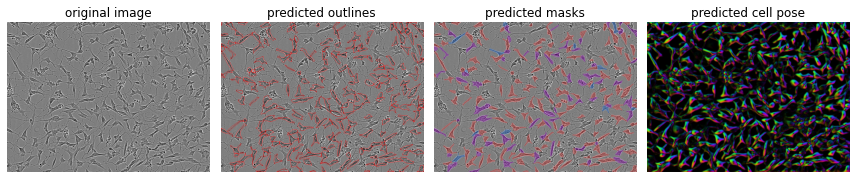

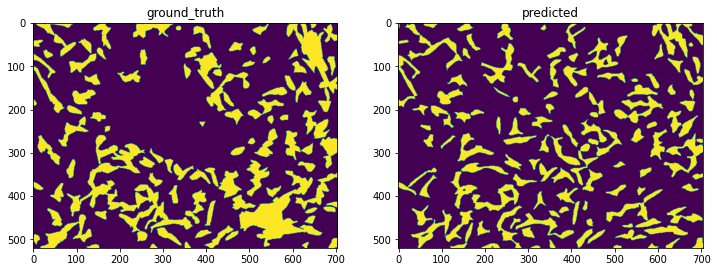

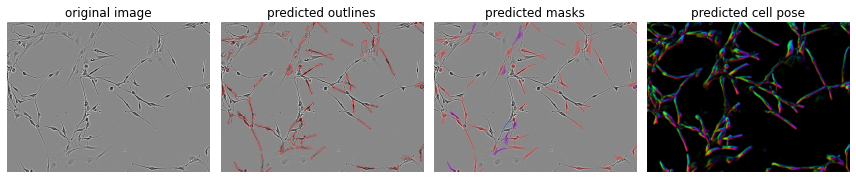

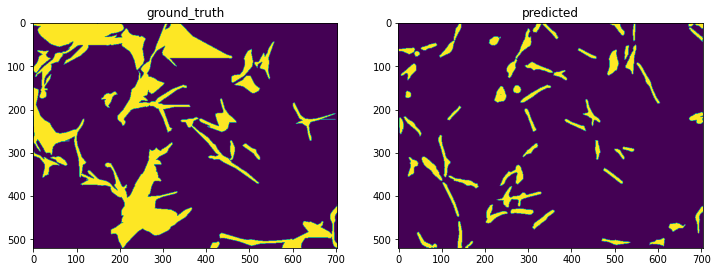

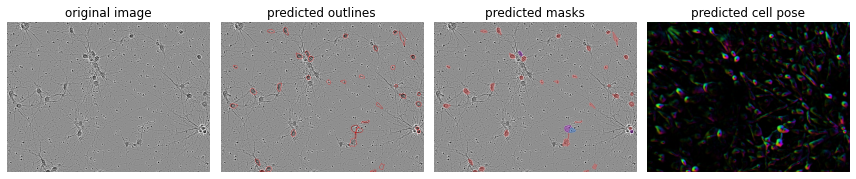

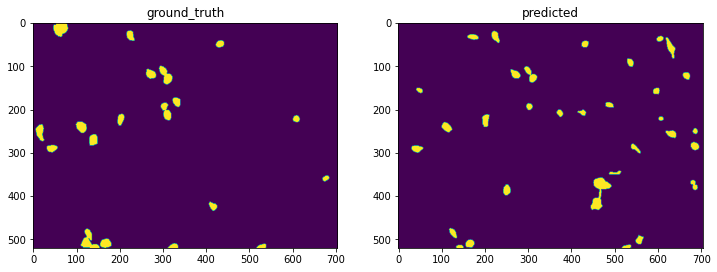

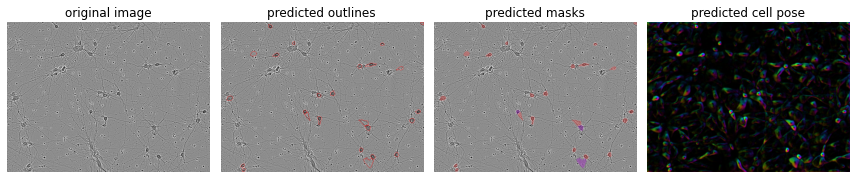

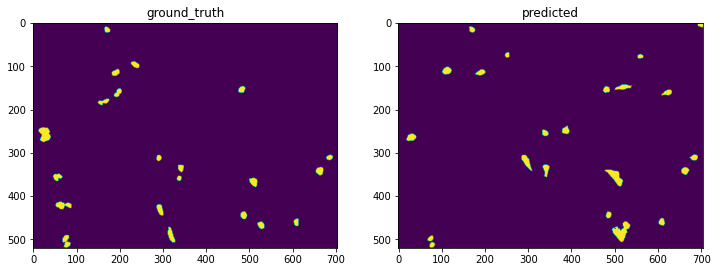

In [44]:
pre_trained_model = "C:/kaggletemp/sartorius-cell-instance-segmentation/CP_TRAINING/ALL/cellpose_residual_on_style_on_concatenation_off_ALL_2021_12_27_22_18_01.287107"

def rle_encode(img):
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

# test_dir =  TRAIN #Path('../input/sartorius-cell-instance-segmentation/train')
# test_files = [fname for fname in test_dir]
test_files = im[0:4]
gtruth = ms[0:4]

model = models.CellposeModel(gpu=False, pretrained_model= pre_trained_model)


for index, filename in enumerate (test_files) :
    img = io.imread(filename)
    masks, flows, styles = model.eval(img, diameter=20, channels=[0,0] ,  resample = True, batch_size= 4)

    # save results so you can load in gui
    #io.masks_flows_to_seg(img, masks, flows, filename, [0,0])

    # save results as png
    #io.save_to_png(img, masks, flows, filename)

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, img, masks, flows[0], channels=[0,0])
    plt.tight_layout()
    plt.show()

    true_mask = imread(gtruth[index])
    plt.figure(figsize= (12,8))
    plt.subplot(1,2,1)
    plt.imshow(true_mask)
    plt.title("ground_truth")
    plt.subplot(1,2,2)
    plt.imshow(masks > 0)
    plt.title("predicted")

    #plt.imshow(true_mask)

In [2]:
model_to_load = 'cyto' ## cyto, cyto2, nuclei
number_of_epochs = 50  ## Train more epochs for better results
batch_size = 8
initial_learning_rate = 1e-4
Training_channel = 0 # For grayscale
Second_training_channel= 0
train_folder = 'C:/kaggletemp/sartorius-cell-instance-segmentation/CP_TRAINING/TRAIN/'
MASK_FILTER = 'masks'
IMG_FILTER = "img"
TEST_DIR = 'C:/kaggletemp/sartorius-cell-instance-segmentation/CP_TRAINING/TEST/'
#test_folder = '/tmp/cellpose_train/val'
# --use_gpu

In [3]:
!python -m cellpose --train --fast_mode \
        --dir "$train_folder"  --use_gpu \
        --test_dir "$TEST_DIR"    \
        --pretrained_model $model_to_load \
        --chan $Training_channel --chan2 $Second_training_channel \
        --n_epochs $number_of_epochs \
        --learning_rate $initial_learning_rate \
        --batch_size $batch_size \
        --mask_filter $MASK_FILTER  --img_filter $IMG_FILTER

creating new log file
2021-12-29 02:03:21,138 [INFO] WRITING LOG OUTPUT TO C:\Users\rpsan\.cellpose\run.log
2021-12-29 02:03:21,238 [INFO] ** TORCH CUDA version installed and working. **
2021-12-29 02:03:21,238 [INFO] >>>> using GPU
Not all flows are present. Run flow generation again.
Not all flows are present. Run flow generation again.
2021-12-29 02:03:22,010 [INFO] >>>> pretrained model C:\kaggletemp\sartorius-cell-instance-segmentation\CELLPOSE_MODELS\cytotorch_0 is being used
2021-12-29 02:03:22,010 [INFO] >>>> during training rescaling images to fixed diameter of 30.0 pixels
2021-12-29 02:03:23,370 [INFO] Training with rescale = 1.00
2021-12-29 02:03:27,154 [INFO] train channels = 2
2021-12-29 02:03:28,113 [INFO] test channels = 2
2021-12-29 02:03:28,114 [INFO] NOTE: computing flows for labels (could be done before to save time)
2021-12-29 02:06:19,611 [INFO] NOTE: computing flows for labels (could be done before to save time)
2021-12-29 02:09:00,399 [INFO] >>> Using RAdam optim


100%|##########| 484/484 [02:48<00:00,  2.87it/s]

100%|##########| 122/122 [02:39<00:00,  1.31s/it]


2021-12-29 04:55:51,281 [INFO] parsing model string cellpose_residual_on_style_on_concatenation_off_TRAIN_2021_12_29_02_09_00.399352 to get cellpose options
2021-12-29 04:55:51,281 [INFO] >>>> using CPU
(520, 704)
0 C:/kaggletemp/sartorius-cell-instance-segmentation\train\0030fd0e6378.png


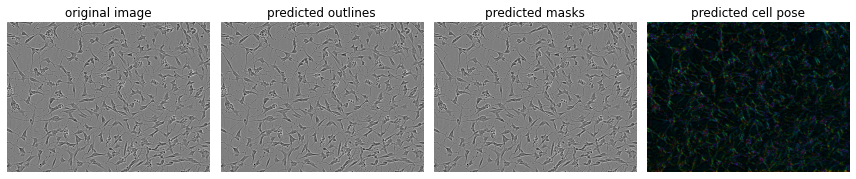

(520, 704)
1 C:/kaggletemp/sartorius-cell-instance-segmentation\train\0140b3c8f445.png


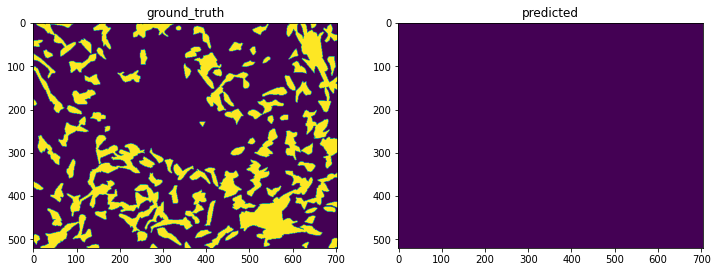

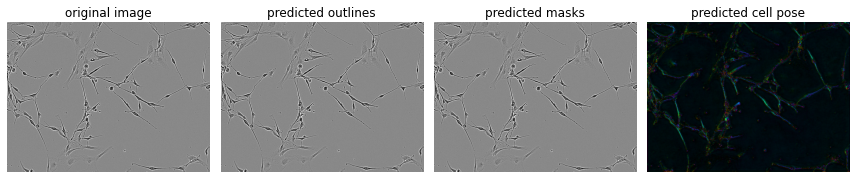

(520, 704)
2 C:/kaggletemp/sartorius-cell-instance-segmentation\train\01ae5a43a2ab.png


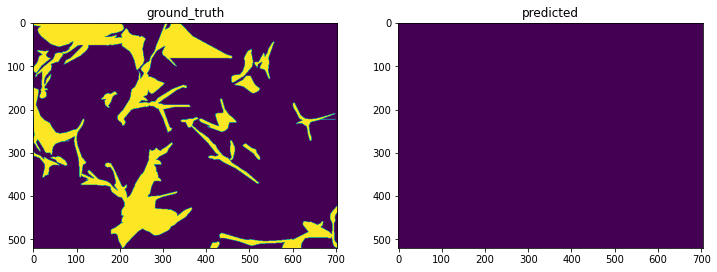

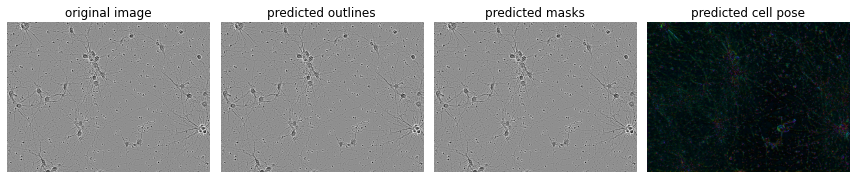

(520, 704)
3 C:/kaggletemp/sartorius-cell-instance-segmentation\train\026b3c2c4b32.png


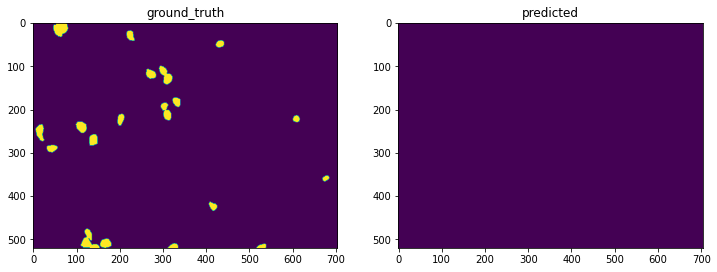

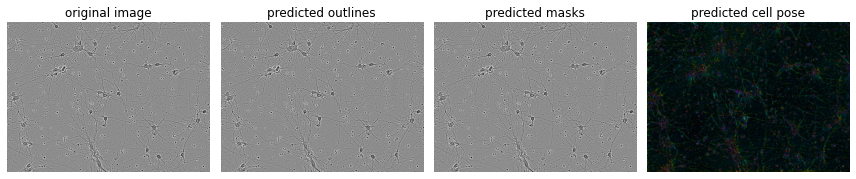

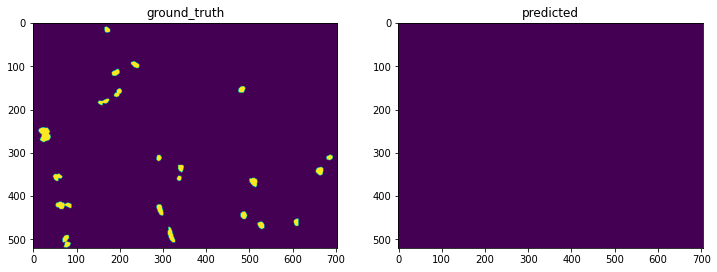

In [4]:
#   C:\kaggletemp\sartorius-cell-instance-segmentation\CP_TRAINING\TRAIN\models/cellpose_residual_on_style_on_concatenation_off_TRAIN_2021_12_29_02_09_00.399352

pre_trained_model = "C:\kaggletemp\sartorius-cell-instance-segmentation\CP_TRAINING\TRAIN\models/cellpose_residual_on_style_on_concatenation_off_TRAIN_2021_12_29_02_09_00.399352"

MASK_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation/mask_cellpose"
DATA_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation"

ms = sorted(glob(os.path.join(MASK_DIR, "*.tif")))
im = sorted(glob(os.path.join(DATA_DIR, "train/*")))

def rle_encode(img):
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

# test_dir =  TRAIN #Path('../input/sartorius-cell-instance-segmentation/train')
# test_files = [fname for fname in test_dir]
test_files = im[0:4]
gtruth = ms[0:4]

model = models.CellposeModel(gpu= False,  pretrained_model=  pre_trained_model)  #model_type= "cyto") #


for index, filename in enumerate (test_files) :
    img = io.imread(filename)
    print ( img.shape)
    masks, flows, styles = model.eval(img, diameter=19, channels=[0,0] ,  resample = True, batch_size= 4)

    # save results so you can load in gui
    #io.masks_flows_to_seg(img, masks, flows, filename, [0,0])

    # save results as png
    #io.save_to_png(img, masks, flows, filename)
    print(index, filename)
    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, img, masks, flows[0], channels=[0,0])
    plt.tight_layout()
    plt.show()

    true_mask = (imread(gtruth[ index ]))
    plt.figure(figsize= (12,8))
    plt.subplot(1,2,1)
    plt.imshow(true_mask)
    plt.title("ground_truth")
    plt.subplot(1,2,2)
    plt.imshow(masks > 0)
    plt.title("predicted")


In [15]:
MASK_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation/mask_cellpose"
DATA_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation"

ms = sorted(glob(os.path.join(MASK_DIR, "*.png")))
im = sorted(glob(os.path.join(DATA_DIR, "train/*")))
# path = "C:/kaggletemp/sartorius-cell-instance-segmentation/mask_cellpose"
# os.listdir(path)

In [24]:
from cellpose import dynamics
from tifffile import imread, imsave
import sys, os
import numpy as np
from tqdm.auto import tqdm
import joblib
import torch
import torch.cuda
#
# #use_gpu = torch.cuda.is_available()
# #device_math = torch.device(type="cuda" if use_gpu else "cpu")
# device_cpu = torch.device("cpu")
# if use_gpu#device_math.type == "cuda":
#     print(f"Using GPU when tensors are loaded to 'device_math'.\n"
#           f"  Device: {torch.cuda.get_device_name()}\n"
#           f"  Number of GPUs: {torch.cuda.device_count()}\n"
#           f"  GPU initialised: {torch.cuda.is_initialized()}\n")
#     #print(torch.cuda.memory_summary())
# else:
#     print("GPU not available, all tensors loaded to 'device_math' will reside "
#           "in CPU memory.")

DATA_DIR = "C:/kaggletemp/sartorius-cell-instance-segmentation"
TDIR = DATA_DIR + "/" + "CP_TRAINING/"
LABEL = TDIR + '/LABEL/'
directory = LABEL  # sys.argv[1]
omni = False
use_gpu = False

if use_gpu:   #device_math.type == "cuda":
    print(f"Using GPU when tensors are loaded to 'device_math'.\n"
          f"  Device: {torch.cuda.get_device_name()}\n"
          f"  Number of GPUs: {torch.cuda.device_count()}\n"
          f"  GPU initialised: {torch.cuda.is_initialized()}\n")
    #print(torch.cuda.memory_summary())
else:
    print("GPU not available, all tensors loaded to 'device_math' will reside "
          "in CPU memory.")

#device =torch.device(type="cuda" ) #device_math

if use_gpu:
    device = torch.device('cuda')
    print("using gpu")
else:
    device =  torch.device("cpu")
    print("using cpu")


mask_files = [x for x in os.listdir(directory) if 'masks.tif' in x]


def compute_and_save_flow(directory, filename):
    mask_filename = os.path.join(directory, filename)
    flow_filename = mask_filename.replace('masks', 'flows')
    mask = imread(mask_filename)
    labels, dist, heat, veci = dynamics.masks_to_flows(mask, use_gpu=use_gpu, device=device, omni=omni)
    if omni:
        flow = np.concatenate((labels[np.newaxis, :, :], dist[np.newaxis, :, :], veci,
                               heat[np.newaxis, :, :]), axis=0).astype(np.float32)
    else:
        flow = np.concatenate((labels[np.newaxis, :, :], labels[np.newaxis, :, :] > 0.5, veci), axis=0).astype(
            np.float32)
    imsave(flow_filename, flow)


_ = joblib.Parallel(n_jobs=8)(
    joblib.delayed(compute_and_save_flow)(directory, filename) for filename in tqdm(mask_files))


GPU not available, all tensors loaded to 'device_math' will reside in CPU memory.
using cpu


  0%|          | 0/606 [00:00<?, ?it/s]

In [11]:
mpath = "C:/Users/rpsan/.cellpose/models/"
modelss = [f for f in  os.listdir(mpath) if f.startswith("cyto2to") ]
modelss = [mpath + x for x in modelss  ]

In [12]:
from cellpose import models
modelx = models.CellposeModel(gpu=True, pretrained_model=  modelss)


2021-12-28 00:24:20,305 [INFO] ** TORCH CUDA version installed and working. **
2021-12-28 00:24:20,306 [INFO] >>>> using GPU


# Auxiliar codes

In [18]:



import os
from pathlib import Path

# old_files = os.listdir(LABEL)
# old_files = [ f for f in old_files if f.endswith('_flows.tif')]
# old_paths = [ Path (os.path.join(LABEL,x)) for x in old_files ]
#
# new_files = [ f.replace('_flows.tif', '_img_flows.tif' ) for f in old_files]
# new_paths = [ Path(os.path.join(LABEL,x)) for x in new_files]
#
# #
# for old, new in enumerate(zip(old_paths, new_paths) ):
#     old.rename(new)

for f in os.listdir(LABEL):
    if f.endswith('_flows.tif') :
        f = os.path.join(LABEL,f)
        os.rename( f, f.replace('_flows.tif', '_img_flows.tif' ) )